In [1]:
from PIL import Image, ImageDraw
from IPython.display import display

In [2]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
import cv2
import csv
import os

In [3]:
os.chdir('./Students')

In [4]:



# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.


# Load a second sample picture and learn how to recognize it.
rohan_image = face_recognition.load_image_file("rohan.jpg")
rohan_face_encoding = face_recognition.face_encodings(rohan_image)[0]



# Load a second sample picture and learn how to recognize it.
raghu_image = face_recognition.load_image_file("raghu.png")
raghu_face_encoding = face_recognition.face_encodings(raghu_image)[0]



# Create arrays of known face encodings and their names
known_face_encodings = [
  
    rohan_face_encoding,
    raghu_face_encoding,
  
    
]
known_face_names = [
  
    "Rohan Padhye",
    "Raghuttam Parvatikar",
 
]

print('Learned encoding for', len(known_face_encodings), 'images.')

Learned encoding for 2 images.


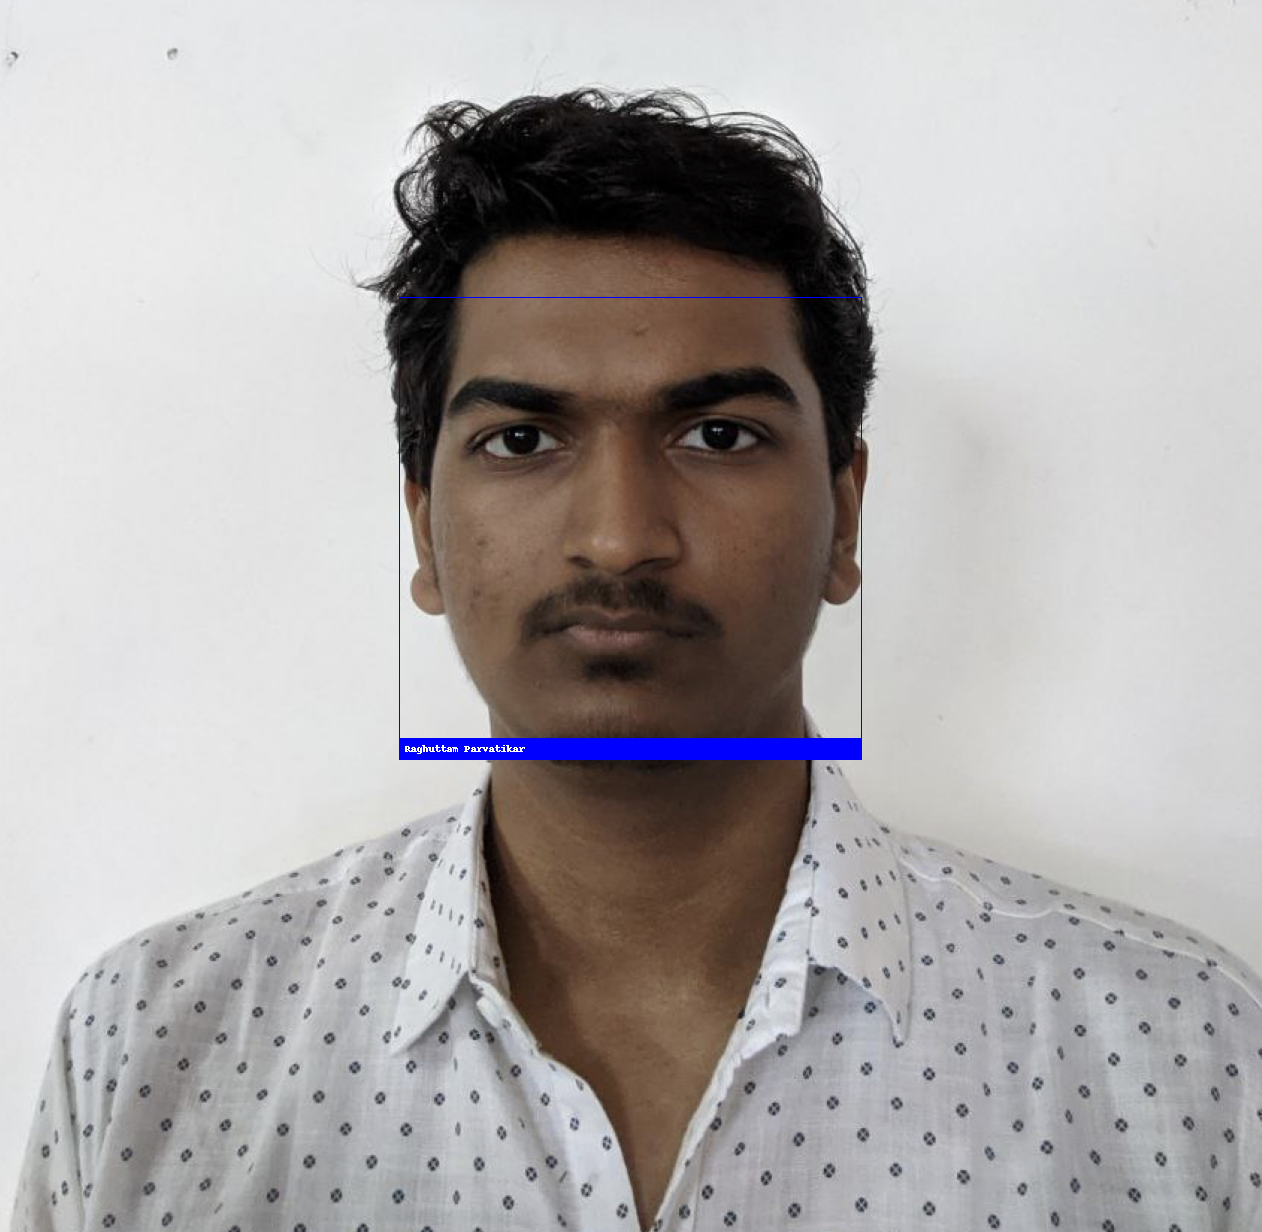

In [5]:
# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("raghu.png")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)

# Final Code

In [8]:
from datetime import datetime



# This is a demo of running face recognition on live video from your webcam. It's a little more complicated than the
# other example, but it includes some basic performance tweaks to make things run a lot faster:
#   1. Process each video frame at 1/4 resolution (though still display it at full resolution)
#   2. Only detect faces in every other frame of video.

# PLEASE NOTE: This example requires OpenCV (the `cv2` library) to be installed only to read from your webcam.
# OpenCV is *not* required to use the face_recognition library. It's only required if you want to run this

# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)



# Load a second sample picture and learn how to recognize it.
rohan_image = face_recognition.load_image_file("Students/rohan.jpg")
rohan_face_encoding = face_recognition.face_encodings(rohan_image)[0]

# Load a second sample picture and learn how to recognize it.
raghu_image = face_recognition.load_image_file("Students/raghu.png")
raghu_face_encoding = face_recognition.face_encodings(raghu_image)[0]


# Load a second sample picture and learn how to recognize it.
omkar_image = face_recognition.load_image_file("Students/omkar2.jpeg")
omkar_face_encoding = face_recognition.face_encodings(omkar_image)[0]

# Load a second sample picture and learn how to recognize it.
adarsh_image = face_recognition.load_image_file("Students/adarsh.png")
adarsh_face_encoding = face_recognition.face_encodings(adarsh_image)[0]

# Load a second sample picture and learn how to recognize it.
vishnu_image = face_recognition.load_image_file("Students/vishnu.png")
vishnu_face_encoding = face_recognition.face_encodings(vishnu_image)[0]


# Create arrays of known face encodings and their names
known_face_encodings = [
  
    rohan_face_encoding,
    raghu_face_encoding,
    omkar_face_encoding,
    adarsh_face_encoding,
    vishnu_face_encoding,


    
]
known_face_names = [
  
    "Rohan Padhye",
    "Raghuttam Parvatikar",
    "Omkar Pawar",
    "Adarsh Kadam",
    "Vishnu",

]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

#     with open('Attendance.csv','+r') as f:
#         myDataList= f.readlines()
#         nameList=[]
#         for lines in myDataList: 
#             entry=lines.split(',')
#             nameList.append(entry[0])
#         if name not in nameList:
#             now=datetime.now()
#             dtString = now.strftime('%H:%M:%S')
#             f.writelines(f'\n{name},{dtString}')





os.chdir('../Attendance')


header = ['Name', 'Time']
now=datetime.now()
fileName = now.strftime('%H:%M:%S')
with open(fileName+'.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(header)



def markAttendance(name):    
    global fileName
    with open(fileName +'.csv') as f:
        myDataList= f.readlines()
        nameList=[]
        for lines in myDataList: 
            entry=lines.split(',')
            nameList.append(entry[0])
        if name not in nameList:
            now=datetime.now()
            dtString = now.strftime('%H:%M:%S')
            f.writelines(f'\n{name},{dtString}')

          
            
            

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            # # If a match was found in known_face_encodings, just use the first one.
            # if True in matches:
            #     first_match_index = matches.index(True)
            #     name = known_face_names[first_match_index]

            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]
                markAttendance(name)

            face_names.append(name)

    process_this_frame = not process_this_frame


    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

FileNotFoundError: [Errno 2] No such file or directory: 'rohan.jpg'